# Multicolinearity 
Occures when two or more regressors are highly correlated with one another increasing the variance and the the confidence intervals, this could lead to problems on the reggresion analysis because it becomes difficult to determine the individual effect of each independent variable on the dependent variable accurately.


In [1]:
import numpy as np
#we create a 10x9 matrix with columns that follow a normal distribution
matrix= np.random.normal(size=(10,9))
np.shape(matrix)

(10, 9)

In [2]:
#now we create one more colum equal to a scalar product of the first 3 columns with a 1,2,3 vector
linearcomb= np.dot(matrix[:, :3], np.array([1, 2, 3]))
linearcomb = linearcomb.reshape(-1, 1)
np.shape(linearcomb)

(10, 1)

In [3]:
#we add the 10th colum
matrix=np.concatenate((matrix,linearcomb),axis=1)
np.shape(matrix)
print(matrix)

[[ 1.58969088e+00 -7.30348240e-01  7.93024764e-02  1.21735017e+00
   1.26095119e+00 -4.90433421e-02  3.54982817e-01  7.71696916e-01
   1.03404626e+00  3.66901831e-01]
 [ 7.21421838e-01  3.31003175e-01 -1.19705572e-01  1.02091490e+00
  -1.79788873e+00  4.84467667e-01  1.20910695e-01  1.05764056e-01
   4.38750196e-01  1.02431147e+00]
 [-1.36571060e+00  5.44294809e-02  1.39325504e+00 -9.37344625e-01
  -1.50370615e+00  2.04346790e-01 -5.91988212e-02 -1.84176075e-01
  -1.14560780e+00  2.92291347e+00]
 [-8.03789920e-01 -3.91626620e-02 -7.58562203e-01 -8.98717217e-01
   5.35747276e-01  1.01871103e+00  3.39745983e-01 -4.96337523e-01
   1.28646920e+00 -3.15780185e+00]
 [-6.72656249e-01  1.01677249e-01 -1.91494412e+00 -4.95510443e-02
  -2.48496119e+00 -1.12566860e+00 -4.46304631e-01  8.96940488e-01
   9.58367919e-01 -6.21413410e+00]
 [-9.68404362e-01 -6.02354454e-01 -6.35928910e-01 -1.60955829e-01
   1.11039414e+00  1.63295276e-01  3.17223979e-01 -1.50320101e+00
  -1.59938896e-01 -4.08090000e+00

In [4]:
#we find the inverse
invmatrix = np.linalg.inv(matrix)
print(invmatrix)

[[-1.63234028e+15  5.34522384e+14 -1.40516173e+15  2.67339767e+14
  -1.06490304e+15 -1.01528866e+15 -4.25947915e+14  3.69016884e+14
  -1.86968193e+14  8.75514679e+13]
 [-3.26468057e+15  1.06904477e+15 -2.81032347e+15  5.34679534e+14
  -2.12980608e+15 -2.03057733e+15 -8.51895829e+14  7.38033769e+14
  -3.73936386e+14  1.75102936e+14]
 [-4.89702085e+15  1.60356715e+15 -4.21548520e+15  8.02019300e+14
  -3.19470912e+15 -3.04586599e+15 -1.27784374e+15  1.10705065e+15
  -5.60904578e+14  2.62654404e+14]
 [-1.94920874e-01  2.83882458e-01 -1.63417823e-01 -4.05299651e-02
  -3.52815595e-01 -6.51862409e-02  1.90016031e-01  3.01784226e-01
  -2.10698315e-02 -2.82260033e-01]
 [ 1.23799476e-01 -3.30933764e-01 -1.02439860e-02  3.24438587e-02
  -5.07271624e-02  1.67912166e-02  1.19556677e-01  3.06294509e-02
   2.91406397e-02 -1.17222929e-01]
 [-5.59483382e-01  5.91084794e-01  2.56935973e-02  2.34678739e-01
  -3.32810230e-01 -3.11017188e-01 -3.55879627e-01 -3.80110698e-01
  -4.46001001e-01 -3.03145831e-01

# Analyzing RCT data with Precision Adjustment

In [5]:
!pip install pyreadr

In [6]:
import pandas as pd
import pyreadr


In [7]:
## loading the data
Penn = pd.read_csv("../../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [8]:
Penn.shape

(5782, 24)

In [9]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durable   

In [10]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [11]:
treatmentgroup=Penn[Penn['T2']==1]
controlgroup=Penn[Penn['T2']==0]

In [12]:
import matplotlib.pyplot as plt

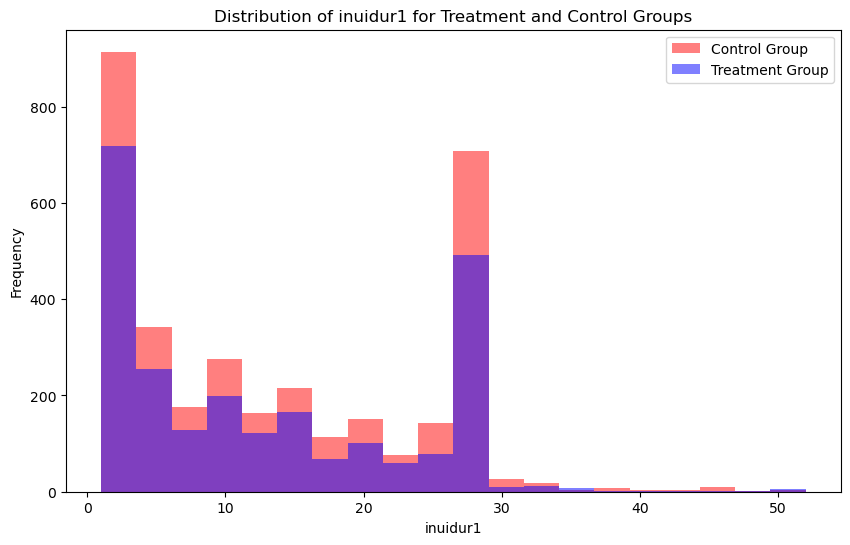

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(controlgroup['inuidur1'], bins=20, alpha=0.5, color='red', label='Control Group')
plt.hist(treatmentgroup['inuidur1'], bins=20, alpha=0.5,color='blue', label='Treatment Group')
plt.xlabel('inuidur1')
plt.ylabel('Frequency')
plt.title('Distribution of inuidur1 for Treatment and Control Groups')
plt.legend()
plt.show()

### Running all specifications

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

In [15]:
formula1 = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"

model_results = smf.ols(formula1, data = Penn).fit().get_robustcov_results(cov_type = "HC1")


print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.748
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           5.79e-51
Time:                        22:41:24   Log-Likelihood:                -4065.8
No. Observations:                5782   AIC:                             8352.
Df Residuals:                    5672   BIC:                             9084.
Df Model:                         109                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5090    

C:\Users\vn.hoyosm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 119, but rank is 108
  warnings.warn('covariance of constraints does not have full '


#### Classical 2-sample approach, no adjustment (CL)

In [16]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'
ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")

print(ols_cl.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Tue, 23 Apr 2024   Prob (F-statistic):             0.0154
Time:                        22:45:50   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

#### Classical linear regression adjustment (CRA)

In [18]:
result = pyreadr.read_r('../../../data/ols_cra_reg_g2.RData')
X_vars = result['X1']
ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     84.52
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:48:00   Log-Likelihood:                -9180.6
No. Observations:                5782   AIC:                         1.857e+04
Df Residuals:                    5678   BIC:                         1.926e+04
Df Model:                         103                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              2.4472 

C:\Users\vn.hoyosm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  warnings.warn('covariance of constraints does not have full '


#### Interactive regression adjustment (IRA)

In [19]:
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] )).reset_index( drop = True )
# Reset index to estimation
# Get data from R
result = pyreadr.read_r('../../../data/ols_ira_reg_g2.RData')
X_vars = result['S1']

ols_ira = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        22:50:11   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\vn.hoyosm\AppData\Local\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


In [22]:
#!pip install multiprocess
# 

In [23]:
import hdmpy as hdm


ModuleNotFoundError: No module named 'hdmpy'

In [133]:
# Get data from R
result = pyreadr.read_r('C:/Users/GA.HornaM/Documents/GitHub/CausalAI-Course/data/rlasso_ira_reg.RData')
X_vars = result['S']

In [134]:
X_vars

,T4,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T4:Xagelt35:agegt54,T4:Xagelt35:durable,T4:Xagelt35:lusd,T4:Xagelt35:husd,T4:Xagegt54:durable,T4:Xagegt54:lusd,T4:Xagegt54:husd,T4:Xdurable:lusd,T4:Xdurable:husd,T4:Xlusd:husd
0,-0.342224,-0.404001,-0.121985,-0.007256,-0.112179,0.836242,-0.203765,-0.235536,-0.225927,0.74093,...,-0.0,0.024699,0.045236,0.042887,0.006175,0.010940,0.009061,0.018591,0.009598,-0.0
1,-0.342224,-0.404001,-0.121985,-0.007256,-0.112179,-0.163758,-0.203765,-0.235536,-0.225927,0.74093,...,-0.0,0.024699,0.045236,0.042887,0.006175,0.010940,0.009061,0.018591,0.009598,-0.0
2,-0.342224,-0.404001,-0.121985,-0.007256,-0.112179,-0.163758,-0.203765,-0.235536,0.774073,-0.25907,...,-0.0,0.024699,0.045236,0.042887,0.006175,0.010940,0.009061,0.018591,0.009598,-0.0
3,0.657776,-0.404001,-0.121985,-0.007256,-0.112179,-0.163758,-0.203765,0.764464,-0.225927,-0.25907,...,0.0,-0.047472,-0.086947,-0.082432,-0.011868,-0.021027,-0.017415,-0.035733,-0.018447,0.0
4,-0.342224,-0.404001,-0.121985,-0.007256,0.887821,-0.163758,-0.203765,-0.235536,-0.225927,0.74093,...,-0.0,0.024699,0.045236,0.042887,-0.336049,-0.331284,0.009061,-0.323633,0.009598,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5094,0.657776,-0.404001,-0.121985,-0.007256,-0.112179,-0.163758,-0.203765,0.764464,-0.225927,-0.25907,...,0.0,-0.047472,-0.086947,-0.082432,-0.011868,-0.021027,-0.017415,-0.035733,-0.018447,0.0
5095,0.657776,-0.404001,-0.121985,-0.007256,-0.112179,0.836242,0.796235,-0.235536,-0.225927,-0.25907,...,0.0,-0.047472,-0.086947,-0.082432,-0.011868,-0.021027,-0.017415,-0.035733,-0.018447,0.0
5096,-0.342224,-0.404001,-0.121985,-0.007256,-0.112179,0.836242,0.796235,-0.235536,-0.225927,-0.25907,...,-0.0,0.024699,-0.296988,0.042887,0.006175,0.010940,0.009061,0.018591,0.009598,-0.0
5097,0.657776,-0.404001,-0.121985,-0.007256,-0.112179,-0.163758,-0.203765,-0.235536,-0.225927,0.74093,...,0.0,-0.047472,-0.086947,-0.082432,-0.011868,-0.021027,-0.017415,-0.035733,-0.018447,0.0


In [58]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )       

rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])

NameError: name 'hdmpy' is not defined

In [59]:
# result.res is a object dictionary

result.res.keys()

AttributeError: 'collections.OrderedDict' object has no attribute 'res'

In [60]:
result.res['coefficients']

AttributeError: 'collections.OrderedDict' object has no attribute 'res'

In [61]:
rlasso_ira

NameError: name 'rlasso_ira' is not defined

In [62]:
table2 = np.zeros((2, 4))
table2[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table2[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2']
table2[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2']
table2[0,3] = rlasso_ira['Coef.']['T2']

table2[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table2[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2']
table2[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2']
table2[1,3] = rlasso_ira['Std.Err.']['T2']

table2 = pd.DataFrame(table2, columns = ["CL", "CRA", "IRA", "IRA Lasso"], \
                      index = ["estimate","standard error"])

table2

NameError: name 'ols_ira' is not defined

* ## Ploting the coefficients

AttributeError: module 'pandas' has no attribute 'np'

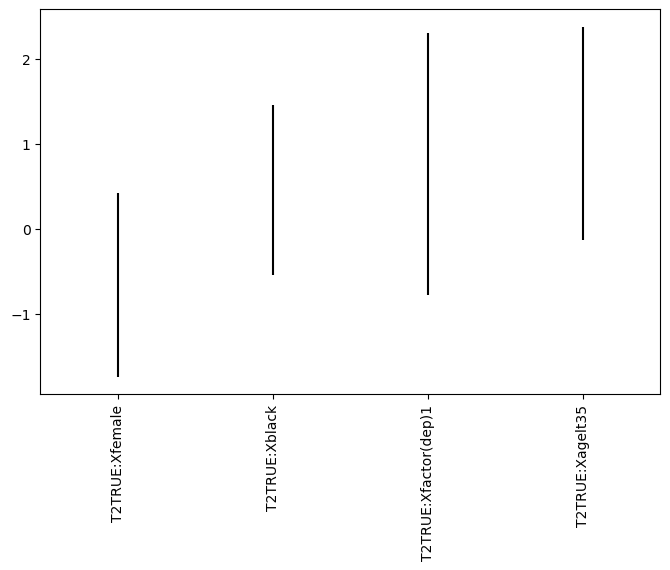

In [27]:
coefficients = pd.DataFrame(ols_ira.summary().tables[1].data)
coefficients=coefficients.drop(0)
coefficients
err_series = coefficients[1].astype(float) - coefficients[5].astype(float)
err_series
coef_df = pd.DataFrame({'coef': ols_ira.params.astype(float),
                        'err': err_series,
                        'varname': coefficients[0]
                       })
coef_df2 = coef_df[(coef_df['varname'] == "T2TRUE:Xfemale") | (coef_df['varname'] == "T2TRUE:Xblack") | (coef_df['varname'] == "T2TRUE:Xagelt35") | (coef_df['varname'] == "T2TRUE:Xfactor(dep)1") ]
fig, ax = plt.subplots(figsize=(8, 5))
coef_df2.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2female', 'T2black', 'T2agelt35', 'T2factor(dep)1'], 
                       rotation=0, fontsize=16)

## A Crash Course in Good and Bad Controls

In [63]:
!pip install causalgraphicalmodels

Defaulting to user installation because normal site-packages is not writeable


                 Z            X            Y
count  1000.000000  1000.000000  1000.000000
mean      0.029934    -0.014368    -0.025265
std       1.000896     1.447251     2.323201
min      -2.863142    -4.386670    -7.619638
25%      -0.655851    -1.026555    -1.567909
50%       0.026082    -0.062923    -0.067622
75%       0.687437     0.977838     1.515434
max       3.122801     4.739789     6.242883

Wrong:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     2855.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          5.19e-295
Time:                        21:24:47   Log-Likelihood:                -1585.9
No. Observations:                1000   AIC:                             3176.
Df Residuals:                     

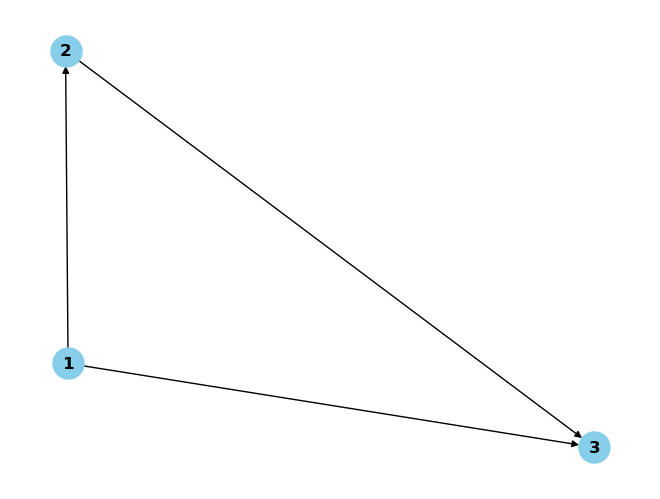

In [65]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import networkx as nx
import matplotlib.pyplot as plt


# Generar datos simulados
n = 1000
Z = np.random.normal(size=n)
X = 1 * Z + np.random.normal(size=n)
Y = X + 0.8 * Z + np.random.normal(size=n)

# Crear DataFrame con los datos
data = pd.DataFrame({'Z': Z, 'X': X, 'Y': Y})

# Resumen de los datos
summary_data = data.describe()
print(summary_data)

# Ajustar modelos de regresión lineal
ols_bad = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
ols_good = sm.OLS(data['Y'], sm.add_constant(data[['X', 'Z']])).fit()

# Resumen de los modelos
table1 = {'Wrong': ols_bad.summary(), 'Classical': ols_good.summary()}

# Nota explicativa
note = "Ex. Smoking (X), Lung Cancer (Y), and Age (Z)\nOlder people are more likely to smoke, and due to age also more likely to develop any type of cancer\nNot controlling for age will bias the estimation"

# Agregar nota al resumen
table1['Note'] = note

# Imprimir resumen
for key, value in table1.items():
    print(f"\n{key}:\n{value}")

# Crear y dibujar un grafo dirigido
edges = [(1, 2), (1, 3), (2, 3)]
g2 = nx.DiGraph(edges)
node_labels = {1: 'z', 2: 'x', 3: 'y'}
nx.set_node_attributes(g2, node_labels, 'name')
nx.draw(g2, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
plt.show()

### Model 2 


Wrong:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     757.9
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          1.39e-124
Time:                        20:47:34   Log-Likelihood:                -2162.8
No. Observations:                1000   AIC:                             4330.
Df Residuals:                     998   BIC:                             4339.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.067      0.036 

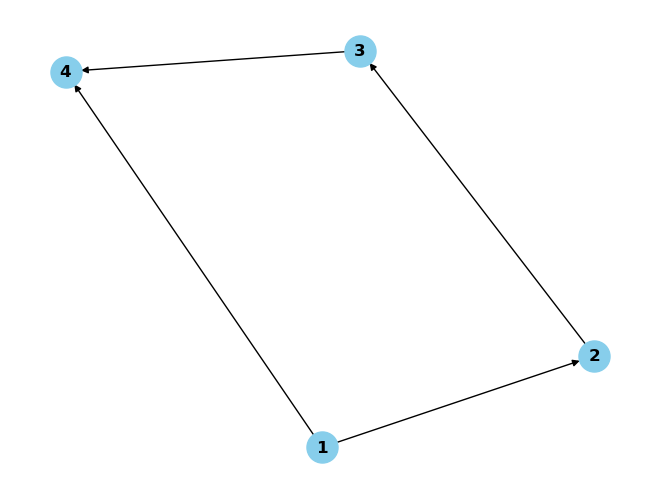

In [38]:
n = 1000
U = np.random.normal(size=n)
Z = 1.5 * U + np.random.normal(size=n)
X = 0.3 * Z + np.random.normal(size=n)
Y = X + 2 * U + np.random.normal(size=n)

# Crear DataFrame con los datos
data = pd.DataFrame({'U': U, 'Z': Z, 'X': X, 'Y': Y})

# Ajustar modelos de regresión lineal
ols_bad = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
ols_good = sm.OLS(data['Y'], sm.add_constant(data[['X', 'Z']])).fit()

# Resumen de los modelos
table2 = {'Wrong': ols_bad.summary(), 'Classical': ols_good.summary()}

# Nota explicativa
note = "(U:Motivation, Z:Study time, X:Highschool grades, Y: UNI enrollment)\nMotivation makes students study more time, so grades increase and so does the probability of enrollment.\nMotivation also can have a direct effect on enrollment.\nAlthough motivation is an unobservable confounder, controlling for Z blocks the backdoor path, diminishing bias."

# Agregar nota al resumen
table2['Note'] = note

# Imprimir resumen
for key, value in table2.items():
    print(f"\n{key}:\n{value}")

# Crear y dibujar un grafo dirigido
edges = [(1, 2), (1, 4), (2, 3), (3, 4)]
g2 = nx.DiGraph(edges)
node_labels = {1: 'u', 2: 'z', 3: 'x', 4: 'y'}
nx.set_node_attributes(g2, node_labels, 'name')
nx.draw(g2, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
plt.show()

### Model 3


Wrong:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     833.6
Date:                Tue, 23 Apr 2024   Prob (F-statistic):          9.70e-134
Time:                        20:49:36   Log-Likelihood:                -1653.4
No. Observations:                1000   AIC:                             3311.
Df Residuals:                     998   BIC:                             3321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0326      0.040     -0.815 

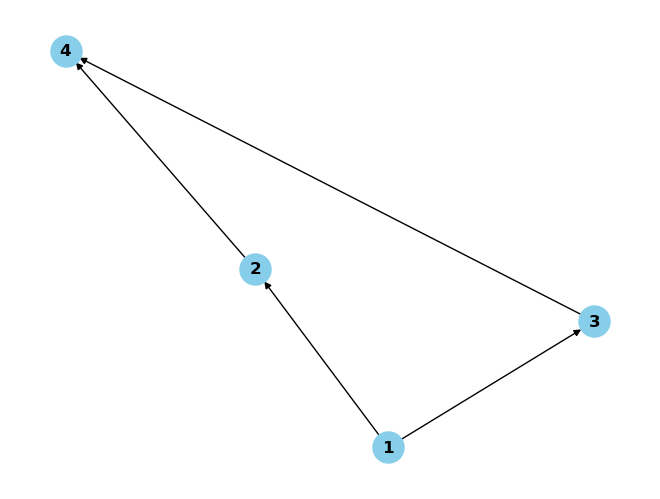

In [40]:
n = 1000
U = np.random.normal(size=n)
Z = 1.1 * U + np.random.normal(size=n)
X = 0.2 * U + np.random.normal(size=n)
Y = X + 0.8 * U + np.random.normal(size=n)

# Crear DataFrame con los datos
data = pd.DataFrame({'Z': Z, 'X': X, 'Y': Y})

# Ajustar modelos de regresión lineal
ols_bad = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
ols_good = sm.OLS(data['Y'], sm.add_constant(data[['X', 'Z']])).fit()

# Resumen de los modelos
table3 = {'Wrong': ols_bad.summary(), 'Classical': ols_good.summary()}

# Nota explicativa
note = "(U: pro-social preferences, X: expenditure in charities, Z: time spend volunteering, Y: feeling of belonging (from a test result))\nPeople with more pro-social preferences may expend more in charities and volunteering more.\nSimilar to the previous example, controlling for X and Z blocks the backdoor path, although social preferences are unobservable"

# Agregar nota al resumen
table3['Note'] = note

# Imprimir resumen
for key, value in table3.items():
    print(f"\n{key}:\n{value}")

# Crear y dibujar un grafo dirigido
edges = [(1, 2), (1, 3), (2, 4), (3, 4)]
g2 = nx.DiGraph(edges)
node_labels = {1: 'u', 2: 'z', 3: 'x', 4: 'y'}
nx.set_node_attributes(g2, node_labels, 'name')
nx.draw(g2, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
plt.show()

### Model 8 


No control:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.289
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     406.2
Date:                Tue, 23 Apr 2024   Prob (F-statistic):           4.63e-76
Time:                        20:51:35   Log-Likelihood:                -2557.8
No. Observations:                1000   AIC:                             5120.
Df Residuals:                     998   BIC:                             5129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0472      0.099      0

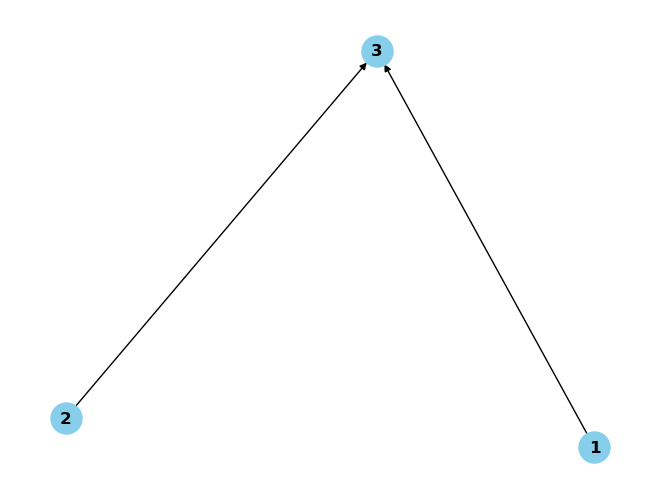

In [41]:
n = 1000
Z = np.random.normal(size=n)
X = np.random.normal(size=n)
Y = 2 * X + 3 * Z + np.random.normal(size=n)

# Crear DataFrame con los datos
data = pd.DataFrame({'Z': Z, 'X': X, 'Y': Y})

# Ajustar modelos de regresión lineal
ols_nocontrol = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
ols_neutralcontrol = sm.OLS(data['Y'], sm.add_constant(data[['X', 'Z']])).fit()

# Resumen de los modelos
table8 = {'No control': ols_nocontrol.summary(), 'Neutral control': ols_neutralcontrol.summary()}

# Nota explicativa
note = "X: dummy whether the person gets a assigned a food subsidy, Z: sex, Y:food consumption\nAlthough no variable is a confounder, adding Z can be good for precision."

# Agregar nota al resumen
table8['Note'] = note

# Imprimir resumen
for key, value in table8.items():
    print(f"\n{key}:\n{value}")

# Crear y dibujar un grafo dirigido
edges = [(1, 3), (2, 3)]
g2 = nx.DiGraph(edges)
node_labels = {1: 'z', 2: 'x', 3: 'y'}
nx.set_node_attributes(g2, node_labels, 'name')
nx.draw(g2, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
plt.show()

### Model 12


No control:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     8801.
Date:                Tue, 23 Apr 2024   Prob (F-statistic):               0.00
Time:                        20:55:52   Log-Likelihood:                -2026.3
No. Observations:                1000   AIC:                             4057.
Df Residuals:                     998   BIC:                             4066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0328      0.058      0

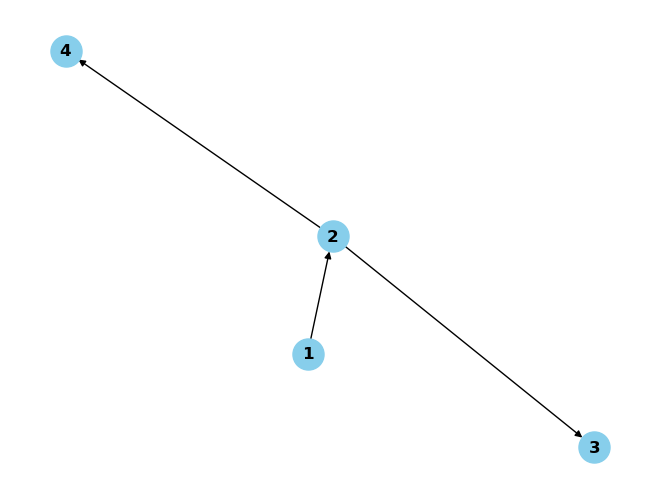

In [42]:
n = 1000
X = np.random.normal(size=n)
M = 3.5 * X + np.random.normal(size=n)
Z = 0.6 * M + np.random.normal(size=n)
Y = 1.5 * M + np.random.normal(size=n)

# Crear DataFrame con los datos
data = pd.DataFrame({'Z': Z, 'X': X, 'M': M, 'Y': Y})

# Ajustar modelos de regresión lineal
ols_nocontrol = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
ols_control = sm.OLS(data['Y'], sm.add_constant(data[['X', 'Z']])).fit()

# Resumen de los modelos
table12 = {'No control': ols_nocontrol.summary(), 'Control (overcontrol bias)': ols_control.summary()}

# Nota explicativa
note = "x: randomly assigned participation of a labor force training program, M: network tips given during training,\nZ: number of work contacts after training program, Y: dummy whether the participant has been employed after 1 year\nZ is not necessarily a mediator, but controlling for it also blocks the causal path we are looking for."

# Agregar nota al resumen
table12['Note'] = note

# Imprimir resumen
for key, value in table12.items():
    print(f"\n{key}:\n{value}")

# Crear y dibujar un grafo dirigido
edges = [(1, 2), (2, 3), (2, 4)]
g2 = nx.DiGraph(edges)
node_labels = {1: 'x', 2: 'm', 3: 'y', 4: 'z'}
nx.set_node_attributes(g2, node_labels, 'name')
nx.draw(g2, with_labels=True, node_size=500, node_color='skyblue', font_size=12, font_weight='bold')
plt.show()